In [1]:
# import libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
median_nofraud = df[df.Class==0].median()
median_fraud = df[df.Class==1].median()
cols = [e for e in median_nofraud.index if abs(median_fraud[e]-median_nofraud[e]) > 4 ]

In [5]:
# data preparation
labels = df.Class
#data = df.drop(columns=['Time', 'Class'])
data = df[cols]
data = data.drop(columns=['Time', 'Amount'])

In [6]:
# scaling data
scaler = StandardScaler()
scaler.fit(data)
X = scaler.transform(data) 

Training model

In [25]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

In [22]:
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 50 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier
RANDOM_STATE = 2023

In [23]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(clf, X, labels, cv=cv, scoring='f1_macro')

In [24]:
print("# F1-score = %.2f (%.2f)"%(np.mean(scores), np.std(scores)))

# F1-score = 0.91 (0.03)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=42, stratify=labels)

In [27]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=6, random_state=2023,
                       verbose=False)

In [28]:
y_pred = clf.predict(X_test)

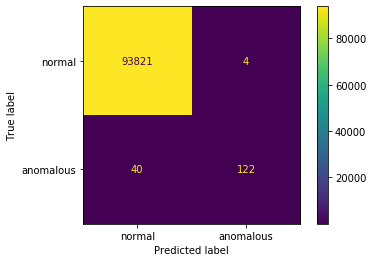

In [29]:
# plotting results
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, precision_score

cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["normal", "anomalous"])
disp.plot()

In [30]:
# Analyse performances
F1 = f1_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)

print('# F1 score = %.2f'%F1)
print('# Recall score = %.2f'%Recall)
print('# Precision score = %.2f'%Precision)

# F1 score = 0.85
# Recall score = 0.75
# Precision score = 0.97
